#### Jupyter notebooks

This is a [Jupyter](http://jupyter.org/) notebook using Python.  You can install Jupyter locally to edit and interact with this notebook.

# Vector Spaces

Vectors represent points in an $n$-dimensional space.  They are represented as arrays of numbers along with primitive operations, as supported by the NumPy `array` type.

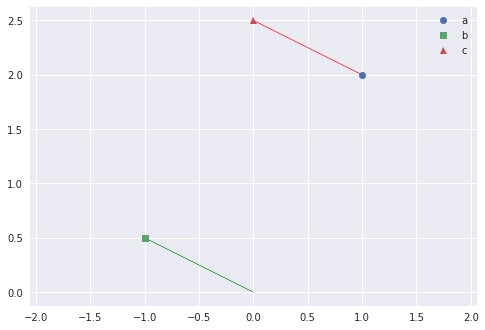

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

a = np.array([1, 2])
b = np.array([-1, .5])
c = a + b
zero = np.zeros_like(a)
# Vectors of length 2 can be plotted like this
plt.plot(a[0], a[1], 'o', label='a')
plt.plot(*b, 's', label='b')
plt.plot(*c, '^', label='c')
plt.plot(*zero)
plt.arrow(*zero, *b, color='g')
plt.arrow(*a, *b, color='r')
plt.legend()
plt.axis('equal');

In [3]:
import pandas as pd
df = pd.DataFrame([(*a, 'a'), 
                   (*b, 'b'),
                   (*c, 'c')],
                  columns=('x', 'y', 'name'))
df

,x,y,name
0,1.0,2.0,a
1,-1.0,0.5,b
2,0.0,2.5,c


In [4]:
import seaborn
seaborn.pointplot(data=df, x='x', y='y', hue='name',
                  markers=['o', 's', '^', 'v']).axis('equal');

ModuleNotFoundError: No module named 'seaborn'

## Linearity

Vector addition and multiplication by a scalar satisfies the properties
\begin{split}
\alpha (x + y) = \alpha x + \alpha y
\end{split}

In [ ]:
0.5 * (a + b) - (0.5 * a + 0.5 * b)

## Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.

In [5]:
a.T @ c

5.0

The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} .$$

In [6]:
def norm(x):
    return np.sqrt(x @ x)

[norm(x) for x in [a, b, c]]

[2.23606797749979, 1.118033988749895, 2.5]

Inner products satisfy the **Cauchy-Schwarz inequality**,
$$ \lvert x^T y \rvert \le \lVert x \rVert \lVert y \rVert. $$

The **angle** $\theta$ between vectors is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$

In [103]:
def theta(x, y):
    return np.arccos(x @ y / (norm(x) * norm(y)))

theta(a, b)

1.5707963267948966

In [104]:
# What is theta(x, x)?
theta(a, a)

2.1073424255447017e-08

In [105]:
a @ a / (norm(a) * norm(a))

0.9999999999999998

In [107]:
np.arccos(1 - 2e-16)

2.1073424255447017e-08

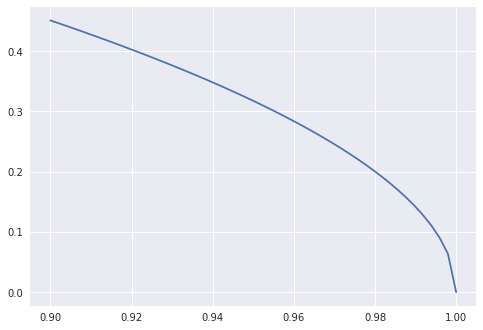

In [108]:
x = np.linspace(.9, 1)
plt.plot(x, np.arccos(x))

Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y . \\
\end{split} $$

The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X .$$

We can use bilinearity and the Cauchy-Schwarz inequality to prove the **triagle inequality** as follows,
\begin{split} \lVert x + y \rVert^2 &= (x + y)^T (x + y) \\
&= x^T x + 2 x^T y + y^T y \\
&\le \lVert x \rVert^2 + 2 \lVert x \rVert \lVert y \rVert + \lVert y \rVert^2 \\
&= (\lVert x \rVert + \lVert y \rVert)^2 .
\end{split}